<h1> Movielens Data Analysis </h1>

<h3> Ankit Parashar </h3>

<h3> Background of Problem Statement</h3>

<p>The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.</p>

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

<h2>Importing datasets <h2>

In [2]:
df_movie = pd.read_csv("movies.dat",sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
df_user = pd.read_csv("users.dat",sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
                       dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
df_ratings = pd.read_csv("ratings.dat",sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                       dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

<h3> Descriptive Analysis for Data <h3>

In [3]:
df_movie.shape

(3883, 3)

In [4]:
df_user.shape

(6040, 5)

In [5]:
df_ratings.shape

(1000209, 4)

In [6]:
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<h3> Checking for null values in all Datasets <h3>

In [9]:
df_movie.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [10]:
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [11]:
df_ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

<p> No null or blank values in Datasets </p>

In [12]:
df_movie.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [13]:
df_user.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [14]:
df_ratings.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [15]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int32
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


In [16]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int32
Gender        6040 non-null object
Age           6040 non-null int32
Occupation    6040 non-null int32
Zip-code      6040 non-null object
dtypes: int32(3), object(2)
memory usage: 165.3+ KB


In [17]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int32
MovieID      1000209 non-null int32
Rating       1000209 non-null int32
Timestamp    1000209 non-null object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


<h2>Merging Datasets to create Master_Data </h2>
<p> Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId) </p>

In [18]:
df_user_ratings = pd.merge(df_user,df_ratings, on='UserID')

In [19]:
df_user_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [20]:
Master_Data = pd.merge(df_user_ratings,df_movie, on='MovieID')

In [21]:
Master_Data.tail(10)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
1000199,5334,F,56,13,46140,3382,5,960796159,Song of Freedom (1936),Drama
1000200,5420,F,1,19,14850,1843,3,960156505,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,F,35,17,45014,286,3,960240881,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,F,35,17,94306,3530,4,959816296,Smoking/No Smoking (1993),Comedy
1000203,5556,M,45,6,92103,2198,3,959445515,Modulations (1998),Documentary
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [22]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int32
Gender        1000209 non-null object
Age           1000209 non-null int32
Occupation    1000209 non-null int32
Zip-code      1000209 non-null object
MovieID       1000209 non-null int32
Rating        1000209 non-null int32
Timestamp     1000209 non-null object
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int32(5), object(5)
memory usage: 64.9+ MB


In [23]:
Master_Data.shape

(1000209, 10)

In [24]:
Master_Data.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
dtype: int64

<p> Master_Data does not have any blank values </p>

<h2>Visual Representation of datasets: Data Visualisation </h2>

<h2>User Age Distribution </h2>

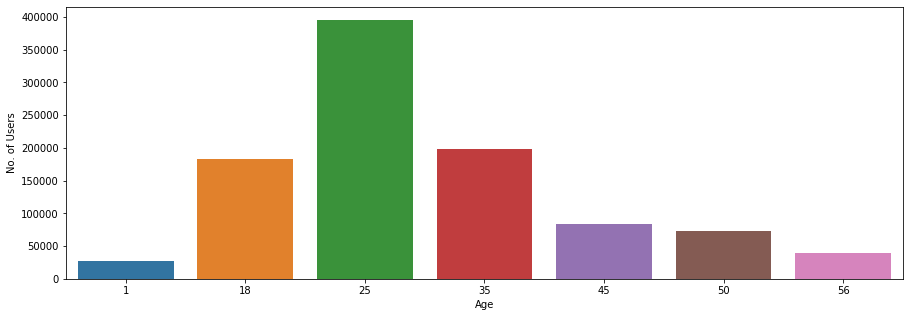

In [76]:
plt.figure(figsize = (15, 5))
sns.barplot(x=Master_Data['Age'].value_counts().to_frame().index,y='Age', data = Master_Data['Age'].value_counts().to_frame())
plt.xlabel('Age')
plt.ylabel('No. of Users')
plt.show()

<h2>User rating of the movie “Toy Story” </h2>

In [26]:
Master_Data_TS = Master_Data[Master_Data['Title']=='Toy Story (1995)']

In [27]:
pd.crosstab(Master_Data_TS.Rating,Master_Data_TS.Age)

Age,1,18,25,35,45,50,56
Rating,,,,,,,
1,2,6,2,3,1,1,1
2,6,14,27,3,5,2,4
3,25,92,105,60,25,25,13
4,45,190,332,154,59,38,17
5,34,146,324,203,53,42,18


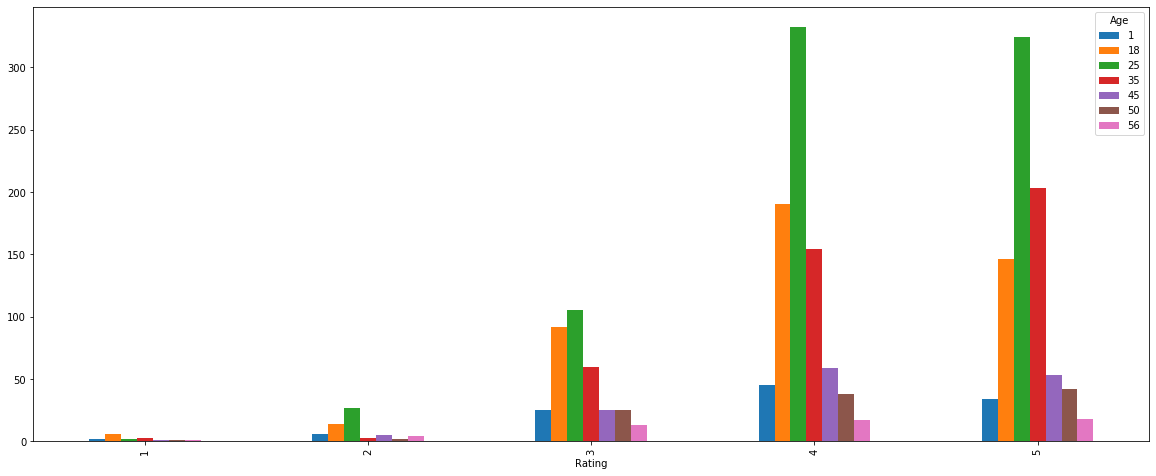

In [28]:
pd.crosstab(Master_Data_TS.Rating,Master_Data_TS.Age).plot.bar(figsize=(20, 8))

<h2>Top 25 movies by viewership rating </h2>

In [29]:
Master_Data[Master_Data.Rating == 5].Title.value_counts().head(25)

American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Godfather, The (1972)                                    1475
Schindler's List (1993)                                  1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
Star War

<h2>Find the ratings for all the movies reviewed by for a particular user of user id = 2696</h2>

In [30]:
Master_Data[Master_Data.UserID == 2696][['Title', 'Rating']]

,Title,Rating
24345,Back to the Future (1985),2
29848,E.T. the Extra-Terrestrial (1982),3
244232,L.A. Confidential (1997),4
250014,Lone Star (1996),5
273633,JFK (1991),1
277808,"Talented Mr. Ripley, The (1999)",4
371178,Midnight in the Garden of Good and Evil (1997),4
377250,Cop Land (1997),3
598042,Palmetto (1998),4
603189,"Perfect Murder, A (1998)",4


<h1>Feature Engineering </h1>

In [78]:
df_movie.Genres.str.get_dummies("|")

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<h2>Adding each Genre as Column </h2>

In [32]:
modified_movie_df = pd.concat([df_movie,df_movie.Genres.str.get_dummies("|")], axis=1)

In [33]:
modified_movie_df.head()

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> Converting Gender values to Numerical values </h3>

In [34]:
df_user_ratings['Gender'] = df_user_ratings['Gender'].replace(['M', 'F'], [1, 0])

In [35]:
df_user_ratings.Gender.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [36]:
df_user_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,0,1,10,48067,1193,5,978300760
1,1,0,1,10,48067,661,3,978302109
2,1,0,1,10,48067,914,3,978301968
3,1,0,1,10,48067,3408,4,978300275
4,1,0,1,10,48067,2355,5,978824291


<h2>Feature affecting movie ratings</h2>

In [37]:
df_merged = pd.concat([df_user_ratings, modified_movie_df], axis = 1)

In [38]:
df_merged.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,MovieID,Title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,10,48067,1193,5,978300760,1.0,Toy Story (1995),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,10,48067,661,3,978302109,2.0,Jumanji (1995),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,10,48067,914,3,978301968,3.0,Grumpier Old Men (1995),...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,1,10,48067,3408,4,978300275,4.0,Waiting to Exhale (1995),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,1,10,48067,2355,5,978824291,5.0,Father of the Bride Part II (1995),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
correlation = df_merged[['Gender', 'Age', 'Occupation', 'Rating', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].corr()
correlation

,Gender,Age,Occupation,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,1.000000,-0.003189,0.114974,-0.019861,0.038732,-0.025359,-0.041432,-0.087676,-0.000492,-0.014110,...,-0.035333,-0.061295,0.016757,-0.070496,-0.026460,-0.006006,0.015431,-0.008590,-0.016142,0.011590
Age,-0.003189,1.000000,0.078371,0.056869,-0.010375,-0.025056,-0.042878,-0.015802,-0.015182,0.015554,...,-0.008334,0.007955,-0.055564,0.021209,0.025972,0.016206,-0.072507,-0.003427,0.038035,-0.004455
Occupation,0.114974,0.078371,1.000000,0.006753,0.027340,0.004705,-0.019483,-0.032572,0.023866,-0.020467,...,-0.009770,-0.042782,-0.001990,-0.067185,-0.013735,0.012365,0.032949,0.017001,-0.048265,-0.008806
Rating,-0.019861,0.056869,0.006753,1.000000,-0.038263,-0.015400,-0.001454,0.014297,-0.001691,0.037782,...,0.013959,0.029484,-0.043694,-0.000085,-0.032555,-0.012005,-0.028448,-0.015175,-0.035396,-0.005756
Action,0.038732,-0.010375,0.027340,-0.038263,1.000000,0.269491,-0.045399,-0.060865,-0.150113,0.093605,...,0.036200,-0.041299,-0.052516,-0.053462,-0.008148,-0.061108,0.212650,0.159700,0.111885,0.006966
Adventure,-0.025359,-0.025056,0.004705,-0.015400,0.269491,1.000000,0.038770,0.252654,-0.093174,-0.027875,...,0.226924,-0.020656,-0.059345,0.004058,-0.028730,-0.022236,0.180770,-0.014468,0.008300,-0.007220
Animation,-0.041432,-0.042878,-0.019483,-0.001454,-0.045399,0.038770,1.000000,0.498564,-0.025595,-0.039963,...,0.050369,-0.002847,-0.046298,0.271978,-0.018185,-0.042487,0.003316,-0.044409,-0.015738,-0.022257
Children's,-0.087676,-0.015802,-0.032572,0.014297,-0.060865,0.252654,0.498564,1.000000,0.034975,-0.063016,...,0.268320,-0.028144,-0.078139,0.183839,-0.031185,-0.075216,-0.015655,-0.096986,-0.040282,-0.019128
Comedy,-0.000492,-0.015182,0.023866,-0.001691,-0.150113,-0.093174,-0.025595,0.034975,1.000000,-0.071807,...,-0.008560,-0.066332,-0.127654,0.019048,-0.067575,0.099765,-0.117760,-0.202803,-0.077507,-0.017058
Crime,-0.014110,0.015554,-0.020467,0.037782,0.093605,-0.027875,-0.039963,-0.063016,-0.071807,1.000000,...,-0.023342,0.135339,-0.050596,-0.041690,0.050476,-0.057744,-0.039781,0.106779,-0.046873,-0.032003


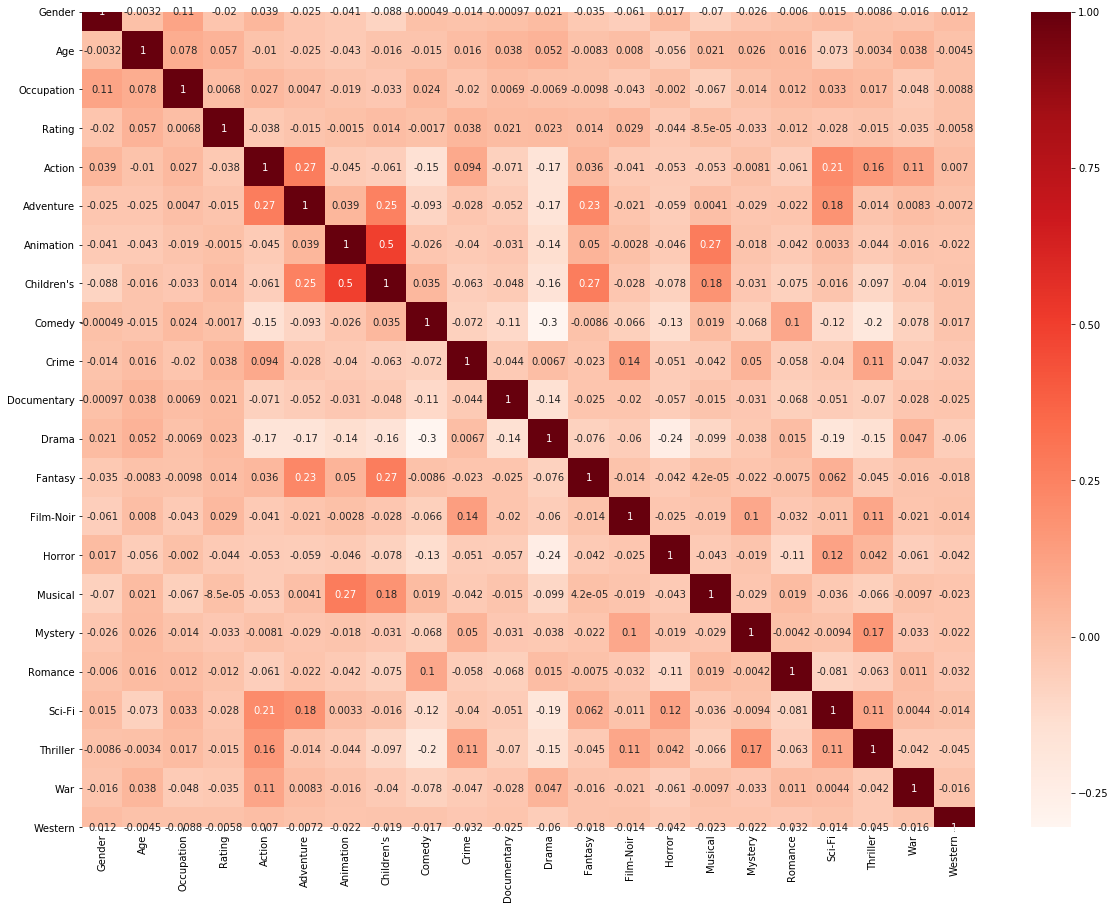

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

<h4>By observing the above plotted heatmap, we can conclude that Rating is influenced by Age of the Viewer and the Genre of the movie. A positive correlation value for Age and Drama Genre indicates that matured audience rate the movies better and that movies of Genre Drama are generally rated higher than others.</h4>

<h2>Model Fitting </h2>

In [41]:
#Merging User Data and Ratings Data for Model fitting
df_model = pd.merge(df_ratings, df_user, how='left', left_on=['UserID'], right_on=['UserID'])

In [42]:
df_model['Gender'] = df_model['Gender'].replace(['M', 'F'], [1, 0])

In [43]:
df_model.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,0,1,10,48067
1,1,661,3,978302109,0,1,10,48067
2,1,914,3,978301968,0,1,10,48067
3,1,3408,4,978300275,0,1,10,48067
4,1,2355,5,978824291,0,1,10,48067


In [44]:
df_model.tail()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
1000204,6040,1091,1,956716541,1,25,6,11106
1000205,6040,1094,5,956704887,1,25,6,11106
1000206,6040,562,5,956704746,1,25,6,11106
1000207,6040,1096,4,956715648,1,25,6,11106
1000208,6040,1097,4,956715569,1,25,6,11106


In [45]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
UserID        1000209 non-null int32
MovieID       1000209 non-null int32
Rating        1000209 non-null int32
Timestamp     1000209 non-null object
Gender        1000209 non-null int64
Age           1000209 non-null int32
Occupation    1000209 non-null int32
Zip-code      1000209 non-null object
dtypes: int32(5), int64(1), object(2)
memory usage: 49.6+ MB


In [46]:
df_model.shape

(1000209, 8)

<h2> Selecting first 10000 records for model fitting </h2>

In [47]:
# Select only few records of whole dataset if in case model fitting takes time
df_model = df_model.head(10000)

In [48]:
#pre-process data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_model['Age'])
x_age = le.transform(df_model['Age'])

In [49]:
le.fit(df_model['Occupation'])
x_occ = le.transform(df_model['Occupation'])

In [50]:
set(x_occ)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [51]:
le.fit(df_model['Gender'])
x_gender = le.transform(df_model['Gender'])

In [52]:
df_model['New Age'] = x_age
df_model['New Occupation'] = x_occ
df_model['New Gender'] = x_gender

In [53]:
df_model.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,New Age,New Occupation,New Gender
0,1,1193,5,978300760,0,1,10,48067,0,9,0
1,1,661,3,978302109,0,1,10,48067,0,9,0
2,1,914,3,978301968,0,1,10,48067,0,9,0
3,1,3408,4,978300275,0,1,10,48067,0,9,0
4,1,2355,5,978824291,0,1,10,48067,0,9,0


<h3> Converting New Age, New Occupation, New Gender to Categorical variables </h3>

In [54]:
df_model['New Gender'] = df_model['New Gender'].astype('category')
df_model['New Occupation'] = df_model['New Occupation'].astype('category')
df_model['New Age'] = df_model['New Age'].astype('category')
df_model['Rating'] = df_model['Rating'].astype('category')

In [55]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
UserID            10000 non-null int32
MovieID           10000 non-null int32
Rating            10000 non-null category
Timestamp         10000 non-null object
Gender            10000 non-null int64
Age               10000 non-null int32
Occupation        10000 non-null int32
Zip-code          10000 non-null object
New Age           10000 non-null category
New Occupation    10000 non-null category
New Gender        10000 non-null category
dtypes: category(4), int32(4), int64(1), object(2)
memory usage: 509.2+ KB


In [56]:
df_model = pd.merge(df_model, df_movie, how='left', left_on=['MovieID'], right_on=['MovieID'])

In [57]:
df_model = pd.concat([df_model,df_model.Genres.str.get_dummies("|")], axis=1)

In [58]:
df_model.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,New Age,New Occupation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,0,1,10,48067,0,9,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,0,1,10,48067,0,9,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,0,1,10,48067,0,9,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,0,1,10,48067,0,9,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,0,1,10,48067,0,9,...,0,0,0,0,0,0,0,0,0,0


In [59]:
New_Genres = list(df_model.columns[13:])

In [60]:
df_model[New_Genres] = df_model[New_Genres].astype('category')

In [61]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
UserID            10000 non-null int32
MovieID           10000 non-null int32
Rating            10000 non-null category
Timestamp         10000 non-null object
Gender            10000 non-null int64
Age               10000 non-null int32
Occupation        10000 non-null int32
Zip-code          10000 non-null object
New Age           10000 non-null category
New Occupation    10000 non-null category
New Gender        10000 non-null category
Title             10000 non-null object
Genres            10000 non-null object
Action            10000 non-null category
Adventure         10000 non-null category
Animation         10000 non-null category
Children's        10000 non-null category
Comedy            10000 non-null category
Crime             10000 non-null category
Documentary       10000 non-null category
Drama             10000 non-null category
Fantasy           10000 non-null 

In [62]:
x_input = df_model[['New Gender', 'New Age', 'New Occupation', 'Action', 'Adventure', 'Animation', "Children's",
                    'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
                    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
y_target = df_model['Rating']

In [63]:
x_input.isnull().sum()

New Gender        0
New Age           0
New Occupation    0
Action            0
Adventure         0
Animation         0
Children's        0
Comedy            0
Crime             0
Documentary       0
Drama             0
Fantasy           0
Film-Noir         0
Horror            0
Musical           0
Mystery           0
Romance           0
Sci-Fi            0
Thriller          0
War               0
Western           0
dtype: int64

<h2> Evaluate Algorithm </h2>

In [64]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [65]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 21), (2500, 21), (7500,), (2500,))

In [66]:
# Fitting Logistic Regression
logitReg = LogisticRegression()
lm = logitReg.fit(x_train, y_train)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
result = logitReg.predict(x_test)
estimated = pd.Series(result, name='Estimated Values')
final_result = pd.concat([y_test, estimated], axis=1)

In [68]:
# Test options and evaluation metric
print(accuracy_score(y_test, result))
print(confusion_matrix(y_test, result))
print(classification_report(y_test, result))

0.3456
[[  0   0  32  82   2]
 [  0   0  56 174  13]
 [  0   0 105 562  39]
 [  0   0 115 689  58]
 [  0   0  59 444  70]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       116
           2       0.00      0.00      0.00       243
           3       0.29      0.15      0.20       706
           4       0.35      0.80      0.49       862
           5       0.38      0.12      0.19       573

    accuracy                           0.35      2500
   macro avg       0.20      0.21      0.17      2500
weighted avg       0.29      0.35      0.27      2500



/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
# Checking other Algorithms fitting
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-package

LR: 0.336267 (0.021883)
LDA: 0.337333 (0.021656)
KNN: 0.350267 (0.021133)
DTC: 0.351867 (0.018081)
NB: 0.101067 (0.011072)


/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rgm/Python/anaconda3/lib/python3.

SVM: 0.380800 (0.020354)


<h4> From above analysis we can infer that SVM Model fits best on this data</h4>